In [1]:
import numpy as np
import tensorflow as tf
import keras

In [2]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

test_dataset = tf.keras.utils.image_dataset_from_directory(
          "/home/arthur/data/test",
           shuffle=True,
           labels='inferred',
           batch_size=BATCH_SIZE,
           image_size=IMG_SIZE)

y_test = tf.concat([y for x, y in test_dataset], axis=0)


Found 16010 files belonging to 5 classes.
tf.Tensor([3 3 3 ... 3 3 3], shape=(16010,), dtype=int32)


In [4]:
loaded_model = keras.models.load_model('corn_classification.h5')
loaded_model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])
y_pred = loaded_model.predict(test_dataset, verbose=2)
y_pred = tf.argmax(y_pred, axis=1)

1001/1001 - 13s


In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

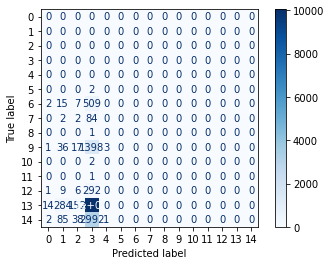

In [8]:
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()